In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
df = pd.read_csv("D:\\Mars Rover Manipal\\Titanic\\titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [241]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [242]:
df1=df.drop(['Cabin','Name','Ticket'],axis=1)
df1 = df1.dropna(subset=['Age'])
df1 = df1.dropna(subset=['Embarked'])

In [243]:
df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [244]:
df1 = pd.get_dummies(df1, columns=["Sex","Embarked"])

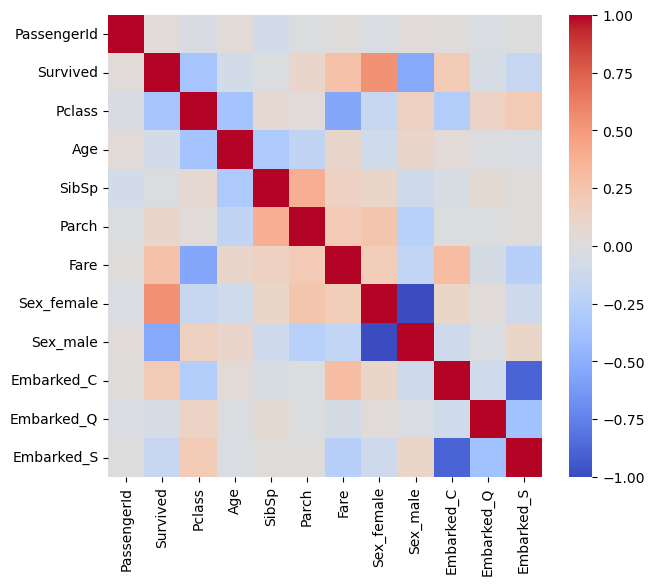

In [245]:
plt.figure(figsize=(7, 6))
sns.heatmap(df1.corr(),cmap="coolwarm")
plt.show()

In [246]:
df = df.dropna(subset=['Age'])
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare']]
y = df['Survived']
X = pd.get_dummies(X, columns=["Sex"])
X=X.drop(['Sex_male'],axis=1)

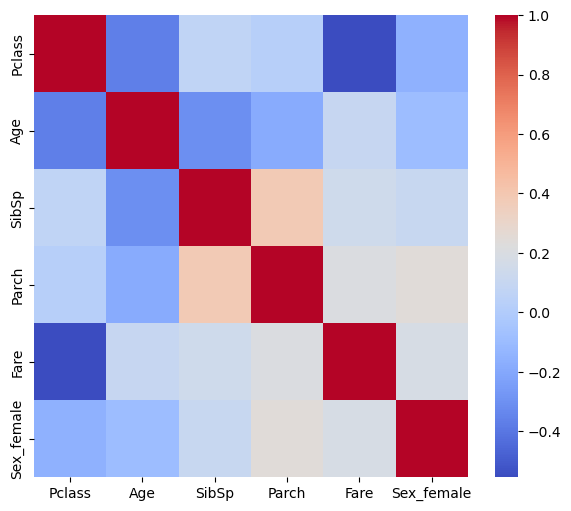

In [247]:
plt.figure(figsize=(7, 6))
sns.heatmap(X.corr(),cmap="coolwarm")
plt.show()

In [248]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def standard(X):
    return (X - X.mean()) / X.std()

X_train = standard(X_train)
X_val = standard(X_val)
X_test = standard(X_test)

X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_val = np.c_[np.ones((X_val.shape[0], 1)), X_val]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [253]:
class SVM:
    def __init__(self, learning_rate=0.3, lambda_param=0.01, n_iters=500):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None

    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)

    def _get_cls_map(self, y):
        return np.where(y <= 0, -1, 1)

    def _satisfy_constraint(self, x, idx):
        linear_model = np.dot(x, self.w)
        return self.cls_map[idx] * linear_model >= 1
    
    def _get_gradients(self, constrain, x, idx):
        if constrain:
            dw = self.lambda_param * self.w
            return dw
        
        dw = self.lambda_param * self.w - np.dot(self.cls_map[idx], x)
        return dw
    
    def _update_weights_bias(self, dw):
        self.w -= self.lr * dw
    
    def fit(self, X, y):
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y)

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constrain = self._satisfy_constraint(x, idx)
                dw= self._get_gradients(constrain, x, idx)
                self._update_weights_bias(dw)
    
    def predict(self, X):
        estimate = np.dot(X, self.w)
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)

In [254]:
clf = SVM(n_iters=500)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [255]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred) / len(y_true)
    return accuracy
def precision_recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    tn = np.sum((y_true == 0) & (y_pred == 0))

    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    tp_rate = recall
    fp_rate = fp / (fp + tn) if (fp + tn) != 0 else 0

    return precision, recall, tp_rate, fp_rate

precision, recall, tp_rate, fp_rate = precision_recall(y_test, predictions)

In [256]:
print("VALIDATION SET:")
print("SVM Accuracy: ", accuracy(y_val, predictions))

precision, recall, tp_rate, fp_rate = precision_recall(y_val, predictions)

print("Precision: ", precision)
print("Recall: ", recall)
print("True Positive Rate (TP rate): ", tp_rate)
print("False Positive Rate (FP rate): ", fp_rate)

VALIDATION SET:
SVM Accuracy:  0.5932203389830508
Precision:  0.49019607843137253
Recall:  0.5319148936170213
True Positive Rate (TP rate):  0.5319148936170213
False Positive Rate (FP rate):  0.36619718309859156


In [257]:
print("TEST SET:")
print("SVM Accuracy: ", accuracy(y_test, predictions))

precision, recall, tp_rate, fp_rate = precision_recall(y_test, predictions)

print("Precision: ", precision)
print("Recall: ", recall)
print("True Positive Rate (TP rate): ", tp_rate)
print("False Positive Rate (FP rate): ", fp_rate)

TEST SET:
SVM Accuracy:  0.788135593220339
Precision:  0.7647058823529411
Recall:  0.75
True Positive Rate (TP rate):  0.75
False Positive Rate (FP rate):  0.18181818181818182
